# Simulations of Stochastic Processes 

**Name:** Bowen Chen

**Section:** 1

**Date:** Jan 29, 2018 

In [1]:
# python set up
import matplotlib.pyplot as plt
import math as m
from scipy.stats import norm 
import numpy as np

### Question 1

Evaluate the following expected values and probabilities: 

* $P(Y_2)> 5$


* $E\big(X_2^{\frac{1}{3}}\big)$


* $E(Y_3)$


* $E(X_2Y_2I(X_2 > 1))$

where the Ito processes X and Y evolve according to the following SDEs:

$dX_t = (\frac{1}{5} - \frac{1}{2}X_t)dt + \frac{2}{3}dW_t ,\ X_0 = 1$

$dY_t = \bigg(\big(\frac{2}{1+t}\big) Y_t + \frac{1 + t^3}{3} \bigg)dt + \frac{1 + t^3}{3}dW_t,\ Y_0 = \frac{3}{4}$

**Solution:**

Build functions to find $X_t$ and $Y_t$. For memory purposes, only save the end points of a path, when a new time step is added, the previous time step is removed

In [2]:
def find_Xt_1(t, steps, paths):
    # initialize parameters
    dt = t/steps
    X0 = 1
    Xt = [np.array([X0]*paths)]

    for i in range(steps):
        # remove the current level of Xt, and append the level of Xt next time step
        Xt_current = Xt.pop()
        Xt.append(Xt_current + ((1/5) - (1/2)*Xt_current)*dt 
                  + (2/3)*m.sqrt(dt)* np.random.normal(0,1, paths))
        
    return Xt[0]

In [3]:
def find_Yt_1(t, steps, paths):
    # initialize parameters
    dt = t/steps
    Y0 = 3/4
    Yt = [np.array([Y0]*paths)]

    for i in range(1, steps + 1):
        # remove the current level of Yt, and append the level of Yt next time step
        Yt_current = Yt.pop()
        Yt.append(Yt_current + ((2/((i*dt) + 1))* Yt_current + ((i*dt)**3 + 1)/3)*dt 
                    + ((i*dt) **3 + 1)/3 *m.sqrt(dt) * np.random.normal(0, 1, paths))
            
    return Yt[0]

Python's Numpy library ensures the normal generated are independent if the np.random.seed() is called only once

In [66]:
# set seed for question 1 to ensure each generated normals draws are independent with each other
np.random.seed(7)

$P(Y_2)> 5$ could be found by counting the number of paths that ended above 5

In [67]:
# Find the level of all simulated paths of Y2
Y2 = find_Yt_1(t = 2, steps = 2000, paths = 10000)

# Find the probability of P(Y2) > 5
P = (Y2 > 5).sum()/10000
print("P(Y2 > 5) = ", P)

P(Y2 > 5) =  0.9764


$E\big(f(X_2)\big) = E\big(X_2^{\frac{1}{3}}\big)$ could be found by taking the cubic root of all $X_2$ paths and find the average of all of the numbers

In [68]:
# Find the level of all simulated paths of Y2
X2 = find_Xt_1(t = 2, steps = 2000, paths = 10000)

# Find the transformed X2 and its expectations
EfX2 = sum(np.sign(X2) * np.absolute(X2)**(1./3.))/10000
print("E(f1(X2)) = ", round(EfX2, 6))

E(f1(X2)) =  0.639727


$E(Y_3)$ could be found by similar techniques

In [7]:
# Find the level of all simulated paths of Y2
Y3 = find_Yt_1(t = 3, steps = 3000, paths = 10000)

# Find the transformed X2 and its expectations
EY3 = sum(Y3)/10000
print("E(Y3) = ", EY3)

E(Y3) =  25.8421048891


$E(X_2Y_2I(X_2 > 1))$ could be found by conditioning on the level of $X_2$, the value of $X_2Y_2I(X_2 > 1)$ will be 0 if $X_2 < 1$. Start with simulating X2 and Y2 

In [71]:
# Find X2 and Y2 with 
X2 = list(find_Xt_1(t = 2, steps = 2000, paths = 10000))
Y2 = list(find_Yt_1(t = 2, steps = 2000, paths = 10000))

Build the function $f(X_2, Y_2) = X_2Y_2\cdot I(X_2 > 1)$, and find its expectation, which gives $E(X_2Y_2I(X_2 > 1))$

In [72]:
# Find the f(X2, Y2) and its expectations
f_XY = list(map(lambda x2, y2: x2*y2 if x2 > 1 else 0, X2, Y2))
Ef_XY = sum(f_XY)/10000 
print ("E(X2Y2 I(X2 > 1)) = ", Ef_XY)

E(X2Y2 I(X2 > 1)) =  3.96796812282


### Question 2

Estimate the following expected values:

* $E(1 + X_3)^{\frac{1}{3}}$

* $E(1 + Y_3)^{\frac{1}{3}}$


Where 

$dX_t = \frac{1}{4}X_t dt + \frac{1}{3}X_t dW_t - \frac{3}{4}X_tdZ_t ,\ X_0 = 1$

$Y_t  = e^{−0.08 t + \frac{1}{3} W_t +\frac{3}{4}Z_t}$

and W, Z are independent random normals

**Solution:**

Build functions that generate paths for $X_t$, $Y_t$. 

$X_t$ is given as a stochastic differential equation, which need to be generated by similiar steps as the SDEs in question 1

In [10]:
def find_Xt_2(t, steps, paths):
    # initialize parameters
    dt = t/steps
    X0 = 1
    Xt = [np.array([X0]*paths)]

    for i in range(steps):
        # remove the current level of Xt, and append the level of Xt next time step
        Xt_current = Xt.pop()
        Xt.append(Xt_current + ((1/4)*Xt_current) *dt 
                  + (1/3)*Xt_current * m.sqrt(dt)* np.random.normal(0, 1, paths)
                  - (3/4)*Xt_current * m.sqrt(dt)* np.random.normal(0, 1, paths))       
    return Xt[0]

$Y_t$ is given as a analytical expression, the random component could be approximated by $\sqrt{t}\cdot N(0, 1)$

In [11]:
def find_Yt_2(t, paths):
    Yt = np.exp(-0.08*t 
             + (1/3)* m.sqrt(t)* np.random.normal(0, 1, paths)
             + (3/4)* m.sqrt(t)* np.random.normal(0, 1, paths))
    return Yt

Set seed for question 2

In [73]:
np.random.seed(7)

Find $E(1 + X_3)^{\frac{1}{3}}$ with 2000 steps and 10,000 paths

In [74]:
# Find the transformed X2 and its expectations
fX3 = 1 + find_Xt_2(t = 3, steps = 3000, paths = 10000)
EfX3 = sum(np.sign(fX3) * np.absolute(fX3)**(1./3.))/10000
print("E(f2(x2)) = ", EfX3)

E(f2(x2)) =  1.33708496992


Find $E(1 + Y_3)^{\frac{1}{3}}$ with 10,000 paths

In [75]:
# Find the transformed X2 and its expectations
fY3 = 1 + find_Yt_2(t = 3, paths = 10000)
EfY3 = sum(np.sign(fY3) * np.absolute(fY3)**(1./3.))/10000
print("E(f2(Y2)) = ", EfY3)

E(f2(Y2)) =  1.34030333788


### Question 3

(a) Write code to compute the prices of European Call options via Monte Carlo simulation.
Use variance reduction techniques (e.g. Antithetic variates) in your estimation. The
function should be generic: for any input of the 5 parameters - $S_0$, $\sigma$, $T$, $X$, $r$ - the output
is the corresponding price of the European call option.


**Solution:**

Build the function that prices the European call option, use 10,000 paths

In [76]:
def euro_call(S0, sd, T, K, r):
    # generate Wt and evaluate ST - K
    Wt = m.sqrt(T)*np.random.normal(0, 1, 50000)
    ST = S0*np.exp(sd*Wt + (r - 0.5*sd**2)*T)
    payoffs = np.array(list(map(lambda st: st - K if st - K > 0 else 0, ST)))
    
    # generate -Wt and evaluate ST(-) - K
    Wt_ = - Wt
    ST_ = S0*np.exp(sd* Wt_ + (r - 0.5*sd**2)*T)
    payoffs_ = np.array(list(map(lambda st_: st_ - K if st_ - K > 0 else 0, ST_)))
    
    # find the average of payoffs and payoffs(-), and then find its expecation
    payoffs = (payoffs + payoffs_)/2
    C = m.exp(-r*T) * sum(payoffs)/len(payoffs)
    
    return (C)

In [77]:
np.random.seed(9)

In [78]:
T = 5
S0 = 88
r = 0.04
sd = 0.2
K = 100

print("The European call option value calculated by Monte Carlo Simulation: ", euro_call(S0, sd, T, K, r))

The European call option value calculated by Monte Carlo Simulation:  18.2575163749


(b) Write code to compute the prices of European Call options by using the Black-Scholes
formula. Use the approximation of N($\cdot$) described in this chapter. The code should be
generic: for any input values of the 5 parameters - $S_0$, $\sigma$, $T$, $X$, $r$ - the output
is the corresponding price of the European call option.

** Solution: **

Use numerical approximation of normal CDF, 

$N(x) = 1 - \frac{1}{2}(1 + d_1 x + d_2 x^2 + d_3 x^3 + d_4 x^4 + d_5 x_5 + d_6 x^6)^{-16} $, if x > 0

$N(x) = 1 - N(-x)$, if x < 0

Build a function of normal CDF

In [18]:
def N(x):
    d1 = 0.0498673470
    d2 = 0.0211410061 
    d3 = 0.0032776263
    d4 = 0.0000380036 
    d5 = 0.0000488906 
    d6 = 0.0000053830
    
    if x > 0:
        N = 1 - (1/2)*(1 + d1*x + d2*x**2 + d3*x**3 
                       + d4*x**4 + d5*x**5 + d6*x**6) **(-16) 
    else:
        N =  1 - (1 - (1/2)*(1 + d1*(-x) + d2*(-x)**2 + d3*(-x)**3 
                       + d4*(-x)**4 + d5*(-x)**5 + d6*(-x)**6) **(-16) )

    
    return N

In [19]:
def BlackSholes_call(S0, sd, T, K, r):
    # find d1 and d2
    d1 = (m.log(S0/K) + (r + 0.5*sd**2)*T)/(sd*m.sqrt(T))
    d2 = d1 - sd*m.sqrt(T)

    # find call option price
    C = S0*N(d1) - K*m.exp(-r*T)*N(d2)
    
    return (C)

In [20]:
T = 5
S0 = 88
r = 0.04
sd = 0.2
K = 100

print ("The European call option price calculated by black-sholes model: ", BlackSholes_call(S0, sd, T, K, r))

The European call option price calculated by black-sholes model:  18.283767108827043


(c) Estimate the hedging parameters of European Call options (all five Greeks) and graph
them as functions of the initial stock price $S_0$. 

Use K = 20, $\sigma$ = 0.25, r = 0.04 and
T = 0.5 in your estimations. Use the range [15, 25] for $S_0$, with a step size of 1.

**Solution:**

Initialize parameters

In [21]:
K = 20
sd = 0.25
r = 0.04
T = 0.5
S0_range = list(range(15, 26))

$Delta = \frac{\partial C_t}{\partial S_t} \cong \large\frac{C(S\ + \epsilon,T,\sigma,r,K)\ -\ C(S ,T,\sigma,r,K)}{\epsilon}$

In [22]:
eps = 0.0001
delta = [(BlackSholes_call(S0_range[i] + eps, sd, T, K, r) 
          -  BlackSholes_call(S0_range[i], sd, T, K, r)) / eps
         for i in list(range(len(S0_range)))]

$Gamma = \frac{\partial^2 C_t}{\partial S_t^2}\cong \large\frac{C(S+ \epsilon,T,\sigma,r,K)\ -\ 2C(S ,T,\sigma,r,K)\ +\ C(S - \epsilon,T,\sigma,r,K)}{(\epsilon)^2}$

In [23]:
gamma = [(BlackSholes_call(S0_range[i] + eps, sd, T, K, r) 
          -  2* BlackSholes_call(S0_range[i], sd, T, K, r)
         + BlackSholes_call(S0_range[i] - eps, sd, T, K, r))/ (eps)**2
         for i in list(range(len(S0_range)))]

$Vega = \frac{\partial C_t}{\partial \sigma} \large = \frac{C(S,T,\sigma + \epsilon,r,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [24]:
vega = [(BlackSholes_call(S0_range[i], sd + eps, T, K, r) 
          -  BlackSholes_call(S0_range[i], sd, T, K, r)) / eps
         for i in list(range(len(S0_range)))]

$Theta = - \frac{\partial C_t}{\partial \sigma} \large = - \frac{C(S,T+ \epsilon,\sigma ,r,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [25]:
theta = [(BlackSholes_call(S0_range[i], sd, T - eps, K, r) 
          -  BlackSholes_call(S0_range[i], sd, T, K, r)) / eps
         for i in list(range(len(S0_range)))]

$Rho =  \frac{\partial C_t}{\partial r} \large = \frac{C(S,T,\sigma ,r + \epsilon,K)\ -\ C(S ,T,\sigma,r,K)\ }{\epsilon}$

In [26]:
rho = [(BlackSholes_call(S0_range[i], sd, T, K, r + eps) 
          -  BlackSholes_call(S0_range[i], sd, T, K, r)) / eps
         for i in list(range(len(S0_range)))]

Plot greeks as functions of the initial stock price $S_0$

In [27]:
delta = list(zip(S0_range, delta))
gamma = list(zip(S0_range, gamma))
vega = list(zip(S0_range, vega))
theta = list(zip(S0_range, theta))
rho = list(zip(S0_range, rho))

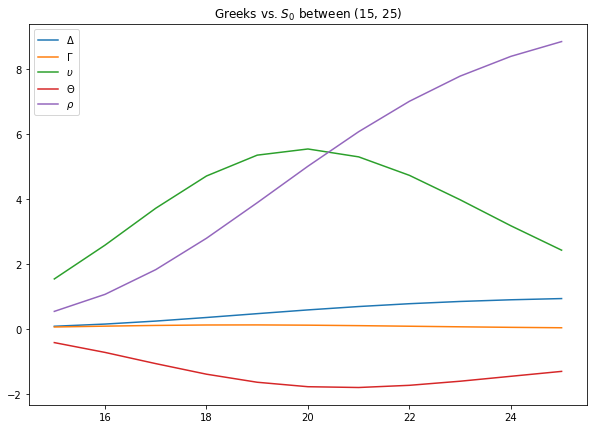

In [28]:
plt.figure(figsize=(10,7))
plt.plot(*zip(*delta), label="$\Delta$")
plt.plot(*zip(*gamma), label = "$\Gamma$")
plt.plot(*zip(*vega), label = "$\\upsilon$")
plt.plot(*zip(*theta), label = "$\Theta$")
plt.plot(*zip(*rho), label = "$\\rho$")
plt.title("Greeks vs. $S_0$ between (15, 25)")
plt.legend()
plt.show()

### Question 4

Consider the following 2-factor model for stock prices with stochastic volatility: 

$dS_t = rS_tdt + \sqrt{V_t}S_t dW_t^1$

$dV_t = \alpha(\beta - V_t)dt + \sigma\sqrt{V_t}dW_t^2$

where the Brownian Motion processes above are correlated: $dW_t^1dW_t^2 = \rho dt$, where the
correlation $\rho$ is a constant in [−1,1]. Compute the price of a European Call option (via
Monte Carlo simulation) that has a strike price of K and matures in T years. 

Use the following parameters of the model: 𝜌 = −0.6, 𝑟 = 0.03, $S_0$ = \$48, $V_0$ = 0.05, $\sigma$ = 0.42, 𝛼 = 5.8, 𝛽 = 0.0625. Use the Full Truncation, Partial Truncation and Reflection methods, and provide 3 price
estimates by using the tree methods.

**Solution:**

Start with generating two random normals that has correlation $\rho$ = -0.6

In [29]:
def bivariate_normals(paths):
    Z1 = np.random.normal(0,1, paths)
    Z2 = np.random.normal(0,1, paths)
    Z = np.array([Z1, Z2])
    cov = np.array([[1,-0.6],[-0.6, 1]])
    L = np.linalg.cholesky(cov)
    V1, V2 = L.dot(Z)
    
    return V1, V2

Find $S_t$ by $dS_t = rS_tdt + \sqrt{V_t}S_t dW_t^1$, where $V_t$ is found by reflection method

In [30]:
def St_reflection(t, steps, paths, a, b, V0, S0, r, sd):
    # initialize sequence
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]

    for i in range(1, steps + 1):
        # generate correlated dWt1, dWt2
        dWt1 = np.sqrt(dt)* bivariate_normals(paths)[0]
        dWt2 = np.sqrt(dt)* bivariate_normals(paths)[1]
        Vt_current = Vt.pop()
        St_current = St.pop()
        St.append(St_current + r*St_current*dt 
                             + np.sqrt(abs(Vt_current))*St_current*dWt1)
        
        Vt.append(abs(Vt_current) + (a* (b - abs(Vt_current)))*dt 
                                  + sd*np.sqrt(abs(Vt_current))*dWt2)
        
    return St[0]

Find $S_t$ by $dS_t = rS_tdt + \sqrt{V_t}S_t dW_t^1$, where $V_t$ is found by full truncation method

In [31]:
def St_full_trunc(t, steps, paths, a, b, V0, S0, r, sd):

    # initialize sequence
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]

    for i in range(1, steps + 1):
        # generate correlated dWt1, dWt2
        dWt1 = np.sqrt(dt)* bivariate_normals(paths)[0]
        dWt2 = np.sqrt(dt)* bivariate_normals(paths)[1]
        # truncate Vt to 0 if < 0
        Vt_current = Vt.pop()
        Vt_current[Vt_current < 0] = 0
        
        St_current = St.pop()
        St.append(St_current + r*St_current*dt 
                                      + np.sqrt(Vt_current)*St_current*dWt1)
        
        Vt.append(Vt_current + (a* (b - Vt_current))*dt 
                  + sd*np.sqrt(Vt_current)*dWt2)
        
    return St[0]

Find $S_t$ by $dS_t = rS_tdt + \sqrt{V_t}S_t dW_t^1$, where $V_t$ is found by partial truncation method

In [32]:
def St_partial_trunc(t, steps, paths, a, b, V0, S0, r, sd):

    # initialize sequence
    dt = t/steps
    Vt = [np.array([V0]*paths)]
    St = [np.array([S0]*paths)]

    for i in range(1, steps + 1):
        # generate correlated dWt1, dWt2
        dWt1 = np.sqrt(dt)* bivariate_normals(paths)[0]
        dWt2 = np.sqrt(dt)* bivariate_normals(paths)[1]
        # truncate Vt to 0 if < 0
        Vt_current = Vt.pop()
        Vt_current_plus = Vt_current.copy()
        Vt_current_plus[Vt_current_plus < 0] = 0

        St_current = St.pop()
        St.append(St_current + r*St_current*dt 
                                      + np.sqrt(Vt_current_plus)*St_current*dWt1)
        
        Vt.append(Vt_current + (a* (b - Vt_current_plus))*dt 
                  + sd*np.sqrt(Vt_current_plus)*dWt2)
        
    return St[0]

Find the option value by three methods

In [33]:
def euro_call_Helston(t, steps, paths, a, b, V0, S0, r, sd, K):
    # generate ST with 3 methods and evaluate ST - K
    st1 =  St_reflection(t, steps, paths, a, b, V0, S0, r, sd)
    st2 = St_full_trunc(t, steps, paths, a, b, V0, S0, r, sd)
    st3 = St_partial_trunc(t, steps, paths, a, b, V0, S0, r, sd)
    
    # find the payoffs
    payoffs_1 = st1 - K 
    payoffs_2 = st2 - K
    payoffs_3 = st3 - K
    
    payoffs_1[payoffs_1 < 0] = 0
    payoffs_2[payoffs_2 < 0] = 0
    payoffs_3[payoffs_3 < 0] = 0
    
    C1 = m.exp(-r*t) * sum(payoffs_1)/len(payoffs_1)
    C2 = m.exp(-r*t) * sum(payoffs_2)/len(payoffs_2)
    C3 = m.exp(-r*t) * sum(payoffs_3)/len(payoffs_3)
    
    return C1, C2, C3

Set seed for question 4

In [34]:
np.random.seed(7)

Calculate the price of European options using 3 methods

In [35]:
# initialize parameters
a = 5.8
b = 0.0625

V0 = 0.05
S0 = 48
r = 0.03
sd = 0.42
t = 5
K = 50
steps = 500
paths = 10000

In [36]:
C1, C2, C3 = euro_call_Helston(t, steps, paths, a, b, V0, S0, r, sd, K)

In [37]:
print("The Halston Model European option found by reflection method: ", C1)
print("The Halston Model European option found by full truncation method: ", C2)
print("The Halston Model European option found by partial truncation method: ", C3)

The Halston Model European option found by reflection method:  12.3523071464
The Halston Model European option found by full truncation method:  12.3908225624
The Halston Model European option found by partial truncation method:  12.7982311675


### Question 5

Compare a sample of pseudo-random numbers with a sample of quasi-MC numbers of Uniform[0,1]x[0,1]

a) Generate 100 2-dimensional vectors of Uniform [0,1]x[0,1] by using any one of the algorithms for random number generation

**Solution:**

Using the LGM method generate 100 Uniformly distributed random pairs on [0,1] 

In [38]:
def generate_random_sequence(seed, n):
    
    rand_sequence = [seed]
    for i in range(1, n + 1):
        rand_sequence.append(7**5 * rand_sequence[i-1] % (2**31 - 1))
        
    return rand_sequence[1:]

In [39]:
def generate_2d_uniform(seed, n):

    rand = generate_random_sequence(seed, n * 2)
    
    # construct uniform random samples from the random sequence above
    U1 = list(map(lambda x1: (x1 + 0.5) / (2**31 - 1), rand[:n]))
    U2 = list(map(lambda x2: (x2 + 0.5) / (2**31 - 1), rand[n:]))
    
    #zip U1, U2 to make U 2-D
    U = list(zip(U1, U2))
    
    return U

In [40]:
U = generate_2d_uniform(7, 100)

b) Generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 7

**Solution: **

The base are chosen  $m_1$ = 2, $m_2$ = 7. Construct a function that generates Halton Number's numerator for the Halton sequence. For every index k in the halton sequence of 1D, convert number k to its base representation, and sum up its 

In [110]:
def Halton_1D(size, base):
    sequence = []
    for i in range(size):
        k, m = 0., 1.
        while i > 0:
            i, a = (i // base, i % base)
            m *= base
            k += a / m
        sequence.append(k)

    return sequence

In [111]:
def Halton_2D(size, m1, m2):
    
    halton_x = Halton_1D(size, m1)
    halton_y = Halton_1D(size, m2)
    
    halton_2d = list(zip(halton_x, halton_y))

    return halton_2d

In [112]:
halton_2D_27 = Halton_2D(100, 2, 7)

c) Generate 100 points of the 2-dimensional Halton sequences, using bases 2 and 4. (note:
4 is a non-prime number!)

**Solution:**

Call *Halton_1D* function and use base 2 and 4

In [113]:
halton_2D_24 = Halton_2D(100, 2, 4)

d) Draw all 3 sequences of random numbers on separate graphs and see if there are differences in the three (visual test only). Comment on your observations.

**Solution:**

**2-D Uniform [0,1]**

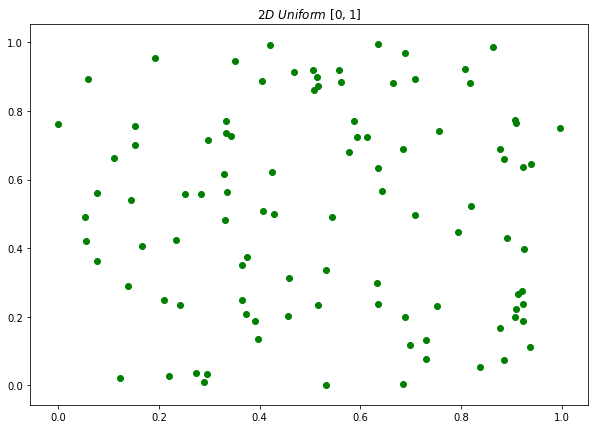

In [114]:
plt.figure(figsize=(10,7))
plt.scatter(*zip(*U), c = 'g')
plt.title("$2D\ Uniform\ [0, 1]$")
plt.show()

**2-D Halton with base 2 and 7**

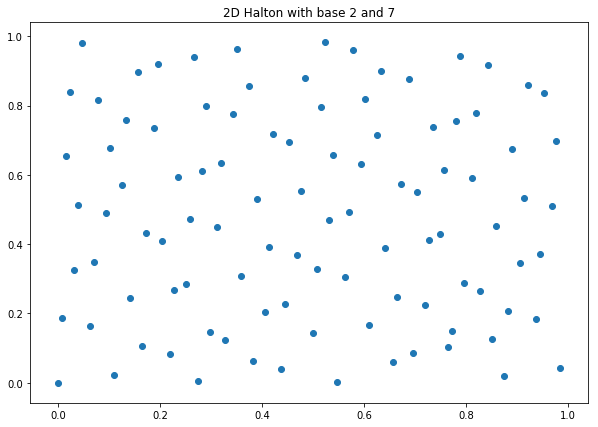

In [115]:
plt.figure(figsize=(10,7))
plt.scatter(*zip(*halton_2D_27))
plt.title("2D Halton with base 2 and 7")
plt.show()

**2-D Halton with base 2 and 4**

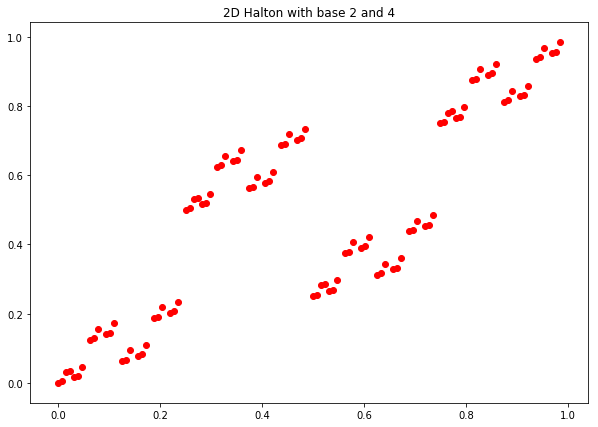

In [116]:
plt.figure(figsize=(10,7))
plt.scatter(*zip(*halton_2D_24), c = 'r')
plt.title("2D Halton with base 2 and 4")
plt.show()

**Comment:**

The 2-D Uniform [0,1] sequence resembled the i.i.d uniform random numbers property well, but it is hard to predict or reuse the number since the generated numbers are unpredictable. The 2-D Halton sequence with base 2 and 7 also demonstrates the uniform property of the i.i.d uniform distribution - when the sample size gets large, the 2-D Halton sequence with base 2 and 7 could be approximately treated as an i.i.d uniform distribution in 2_D. However, the 2-D Halton sequence with base 2 and 4 shows strong correlation between the x and y dimensions - therefore does not resemble the i.i.d uniform property in 2-dimension well. The 2-D Halton sequence with base 2 and 4 should not be used to approximate any integrals

d) Use 2-dimensional Halton sequences to compute the following integral: 

$$\int_{0}^{1}\int_{0}^{1}e^{-xy}sin(6\pi x) + cos^{\frac{1}{3}}(2\pi y) dxdy$$

Use N=10,000. Try different couples for bases: (2,4), (2,7), (5,7).

**Solution:**

Define the function $f(x, y) = e^{-xy}sin(6\pi x) + cos^{\frac{1}{3}}(2\pi y)$

In [117]:
def f(x,y):
    f = (m.exp(-x * y)*(m.sin(6*m.pi* x) 
        + np.sign(m.cos(2*m.pi *y)) * np.absolute(m.cos(2*m.pi *y))**(1./3.)))
    return f

Start with base (2, 4), generate 10,000 Halton Sequence pairs

In [118]:
halton_24 = Halton_2D(10000, 2, 4)
x, y = list(zip(*halton_24))
integral1 = sum(map(f, x, y))/len(halton_24)

Halton Sequence pairs with base (2, 7)

In [119]:
halton_27 = Halton_2D(10000, 2, 7)
x, y = list(zip(*halton_27))
integral2 = sum(map(f, x, y))/len(halton_27)

Halton Sequence pairs with base (5, 7)

In [120]:
halton_57 = Halton_2D(10000, 5, 7)
x, y = list(zip(*halton_57))
integral3 = sum(map(f, x, y))/len(halton_57)

In [121]:
print("The approximated value of integral using Halton (2,4): ",  integral1)
print("The approximated value of integral using Halton (2,7): ",  integral2)
print("The approximated value of integral using Halton (5,7): ",  integral3)

The approximated value of integral using Halton (2,4):  -0.00494444321835
The approximated value of integral using Halton (2,7):  0.0262490381943
The approximated value of integral using Halton (5,7):  0.026358892825
